In [1]:
import sys
from pathlib import Path

# Add project root to path
project_root = Path().resolve().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

In [2]:
import tifffile
import matplotlib.pyplot as plt
import os

In [3]:
image_path = project_root / "data/images"
mask_path = project_root / "data/masks"

In [4]:
image_paths = sorted(
    [image_path / path for path in os.listdir(image_path) if not path.startswith(".")]
)
image_paths

[PosixPath('/Users/levin/Documents/Uni/Master/semester_3/research_project/ASON/data/images/CTRL_1_M1_3R__0004.tif'),
 PosixPath('/Users/levin/Documents/Uni/Master/semester_3/research_project/ASON/data/images/CTRL_2_M6_3R__0002.tif'),
 PosixPath('/Users/levin/Documents/Uni/Master/semester_3/research_project/ASON/data/images/CTRL_3_M2_4R__0006.tif'),
 PosixPath('/Users/levin/Documents/Uni/Master/semester_3/research_project/ASON/data/images/CTRL_4_M6_3L__0008.tif'),
 PosixPath('/Users/levin/Documents/Uni/Master/semester_3/research_project/ASON/data/images/E2+DHT_1_M13_3L_0001.tif'),
 PosixPath('/Users/levin/Documents/Uni/Master/semester_3/research_project/ASON/data/images/E2+DHT_1_M13_3L_0010.tif'),
 PosixPath('/Users/levin/Documents/Uni/Master/semester_3/research_project/ASON/data/images/E2+DHT_2_M10_3R_0002.tif'),
 PosixPath('/Users/levin/Documents/Uni/Master/semester_3/research_project/ASON/data/images/E2+DHT_2_M13_4L_0004.tif'),
 PosixPath('/Users/levin/Documents/Uni/Master/semester_3

In [5]:
mask_paths = sorted(
    [mask_path / path for path in os.listdir(mask_path) if not path.startswith(".")]
)
mask_paths

[PosixPath('/Users/levin/Documents/Uni/Master/semester_3/research_project/ASON/data/masks/mask_CTRL_1_M1_3R__0004.tif'),
 PosixPath('/Users/levin/Documents/Uni/Master/semester_3/research_project/ASON/data/masks/mask_CTRL_2_M6_3R__0002.tif'),
 PosixPath('/Users/levin/Documents/Uni/Master/semester_3/research_project/ASON/data/masks/mask_CTRL_3_M2_4R__0006.tif'),
 PosixPath('/Users/levin/Documents/Uni/Master/semester_3/research_project/ASON/data/masks/mask_CTRL_4_M6_3L__0008.tif'),
 PosixPath('/Users/levin/Documents/Uni/Master/semester_3/research_project/ASON/data/masks/mask_E2+DHT_1_M13_3L_0001.tif'),
 PosixPath('/Users/levin/Documents/Uni/Master/semester_3/research_project/ASON/data/masks/mask_E2+DHT_1_M13_3L_0010.tif'),
 PosixPath('/Users/levin/Documents/Uni/Master/semester_3/research_project/ASON/data/masks/mask_E2+DHT_2_M10_3R_0002.tif'),
 PosixPath('/Users/levin/Documents/Uni/Master/semester_3/research_project/ASON/data/masks/mask_E2+DHT_2_M13_4L_0004.tif'),
 PosixPath('/Users/levin

Text(0.5, 1.0, 'mask')

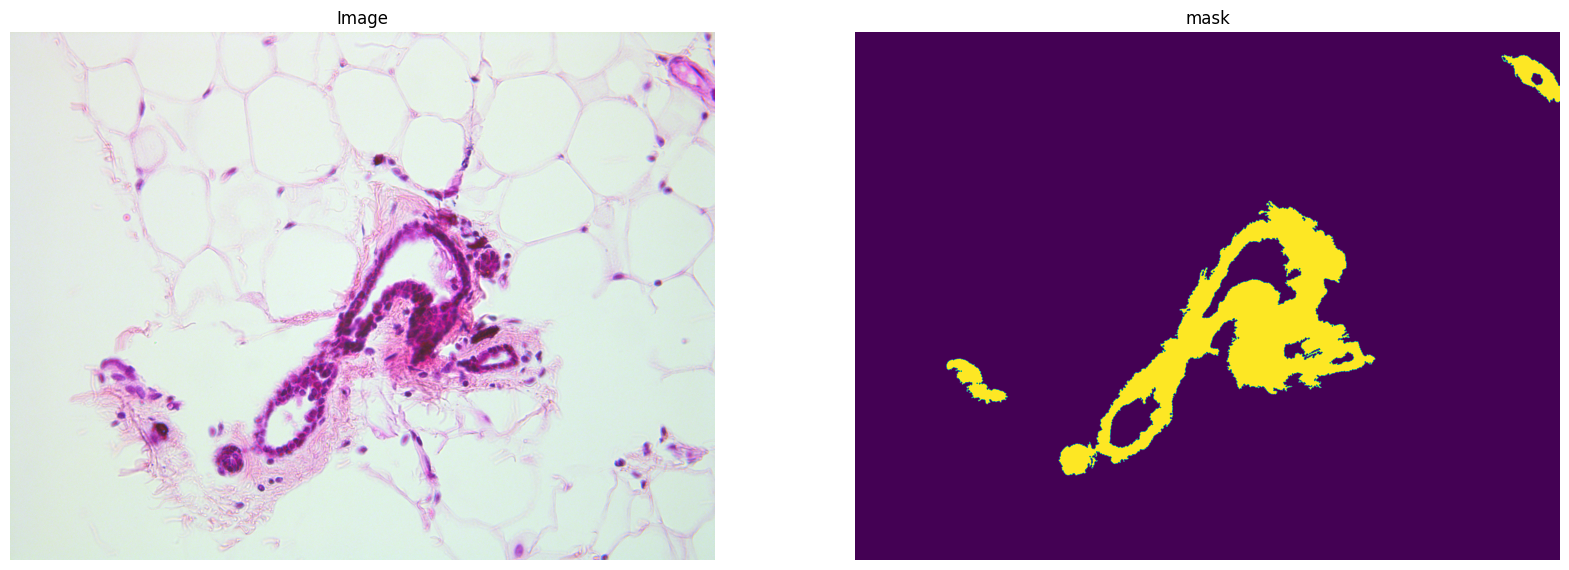

In [6]:
images = list(map(tifffile.imread, image_paths))
masks = list(map(tifffile.imread, mask_paths))
data = list(zip(images, masks))

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(data[0][0])
plt.axis("off")
plt.title("Image")

plt.subplot(1, 2, 2)
plt.imshow(data[0][1])
plt.axis("off")
plt.title("mask")

In [9]:
# def clean_mask(mask):
#     mask = mask.astype(bool)
#     mask = remove_small_objects(mask, min_size=200)
#     mask = remove_small_holes(mask, area_threshold=10)
#     rad = disk(radius=2)
#     smoothed_mask = binary_closing(mask, rad)
#     return smoothed_mask

In [12]:
# cleaned_masks = []

# for image, mask in data:
#     cleaned_mask = clean_mask(mask)
#     cleaned_masks.append(cleaned_mask)

#     plt.figure(figsize=(20, 10))

#     plt.subplot(1, 2, 1)
#     plt.imshow(image)
#     plt.axis("off")
#     plt.title("Mask before cleaning")

#     plt.subplot(1, 2, 2)
#     plt.imshow(cleaned_mask)
#     plt.axis("off")
#     plt.title("Mask after cleaning")

#     plt.show()

In [7]:
from skimage.transform import resize


def cut_out_image(image, mask):
    resized_mask = resize(
        mask, (image.shape[0], image.shape[1]), order=0, preserve_range=True
    )
    cut_image = image.copy()
    resized_mask = resized_mask.astype(bool)
    cut_image[~resized_mask] = 255
    return cut_image

In [2]:
# data = list(zip(images, cleaned_masks))

# for image, mask in data:
#     cut_image = cut_out_image(image, mask)

#     plt.figure(figsize=(20, 10))

#     plt.subplot(1, 2, 1)
#     plt.imshow(image)
#     plt.axis("off")
#     plt.title("Image")

#     plt.subplot(1, 2, 2)
#     plt.imshow(cut_image)
#     plt.axis("off")
#     plt.title("Cut out image")

#     plt.show()

In [13]:
import cv2 as cv

In [14]:
def threshold_image(img, thresh_params):
    """
    Apply different type of threshold to a given image + threshold value
    """

    """
    Apply a threshold on a given image.
    :param image: Image to enhance contrast
    :param thresh_params: Parameters of the thresholdinf
    :return: img_thresh: thresholded image
    """

    thre, img_thresh = cv.threshold(
        img, thresh_params["thresh"], thresh_params["value"], thresh_params["ttype"]
    )
    if thresh_params["ttype"] == cv.THRESH_BINARY + cv.THRESH_OTSU:
        print(f"Otsu threshold value is: {thre}")
    return img_thresh